# Project Goal
The idea of this project is to showcase 

1. Explore a fairly complex diabetes dataset
2. How to implement a simple machine learning algorithm, KNN by myself
3. Compare own implementation performance with one of the off-shelf library model from sklearn.
4. Effect of feature scaling and feature selection on model.
5. Parameter tuning for KNN.
6. My approach to machine learning or data science is to follow the **KISS** principle, meaning Keep it simple, Stupid. If I can explain something in 2-3 words I don't need to picture i.e don't plot. I emphasize on explainable models than super shiny new models which are hard to explain to business.


# References

1. https://dergipark.org.tr/en/download/article-file/1970853
2. https://pmc.ncbi.nlm.nih.gov/articles/PMC8306487/
3. https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data

# Dataset Source

The dataset comes from 

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

About Dataset
Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?



# Data Dictionary Exploration with added reaserched information
Below I will try to research about the column meaning and their expected ranges. I include links I found useful.
 
| No. | Column Name | Information |
| :- | :- | :- |
| 1 |Pregnancies|Number of times pregnant|
| 2 |Glucose|From Dataset:<br> Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br><br>More Info: [Source](https://www.ncbi.nlm.nih.gov/books/NBK532915/#:~:text=The%202%2Dhour%20plasma%20glucose,200%20mg/dL%20indicates%20diabetes)<br>**The 2-hour plasma glucose level <140 mg/dL is considered normal.<br>The 2-hour plasma glucose level of 140-199 mg/dL indicates impaired glucose tolerance.<br>The 2-hour plasma glucose level ≥200 mg/dL indicates diabetes**|
| 3 |BloodPressure|From Dataset:<br>Diastolic blood pressure (mm Hg)<br><br> More Info: [Source](https://www.nhlbi.nih.gov/health/high-blood-pressure)<br>**Blood pressures are written as two numbers separated by a slash like this: 120/80 mm Hg. You can say this as “120 over 80 millimeters of mercury” or just as “120 over 80.” The first number is your  systolic pressure — that’s the force of the blood flow when blood is pumped out of the heart. The second number is your  diastolic pressure, which is measured between heartbeats when the heart is filling with blood.**|
| 4 |SkinThickness|From Dataset:<br>Triceps skin fold thickness (mm)<br><br> More Info: [Source 1](https://nutritionalassessment.mumc.nl/en/skinfold-measurements) [Source 2](https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/skinfold-thickness#:~:text=In%20clinical%20practice%2C%20body%20weight,sudden%20changes%20in%20fat%20stores.)<br>**Hard to say what 0 means here, probably the women had extremely low body fat**|
| 5 |Insulin|From Dataset:<br>2-Hour serum insulin (mu U/ml)<br><br> More Info: [Source](https://emedicine.medscape.com/article/2089224-overview)<br>**Range seems to be between 16-166 mIU/L**|
| 6 |BMI|From Dataset:<br>Body mass index (weight in kg/(height in m)^2)<br><br> More Info: [Source](https://www.medicalnewstoday.com/articles/bmi-for-women#:~:text=A%20moderate%20BMI%20for%20females,to%20work%20out%20their%20BMI.)<br>**Range seems to be between : moderate BMI for females is usually 18.5–24.9**|
| 7 |DiabetesPedigreeFunction|From Dataset:<br>Diabetes pedigree function<br><br> More Info: [Source](https://dergipark.org.tr/en/download/article-file/1970853#:~:text=The%20'DiabetesPedigreeFunction'%20is%20a%20function,1%20represents%20those%20with%20diabetes.)<br>**The 'DiabetesPedigreeFunction' is a function that scores the probability of diabetes based on family history**|
| 8 |Age|From Dataset:<br>Age (years)|
| 9 |**Outcome**|Class variable (0 or 1) 268 of 768 are 1, the others are 0|


# Loading and exploring the dataset

In [1]:
import pandas as pd
diab = pd.read_csv('diabetes.csv')
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**As we can see there are 768 non null observations with 8 feature columns and 1 Outcome columm which shows whether the subject had actual diabetes or not.**

In [4]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



## Zero Values Issue
As we can see above, for some columns the 0 values makes sense, but for others like **Glucose, BloodPressure etc** it does not make sense to have 0 values.

It could be that the measurements were missing or the test or the measuring intrument made a mistake or simply a recording error.

In [5]:
# Let's count how many sero values we have in each column
print('Column', ',Zero_Count')
print('-----------------------------')
for c in diab.columns:
    print(c, ',',(diab[c] == 0).sum())

Column ,Zero_Count
-----------------------------
Pregnancies , 111
Glucose , 5
BloodPressure , 35
SkinThickness , 227
Insulin , 374
BMI , 11
DiabetesPedigreeFunction , 0
Age , 0
Outcome , 500


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

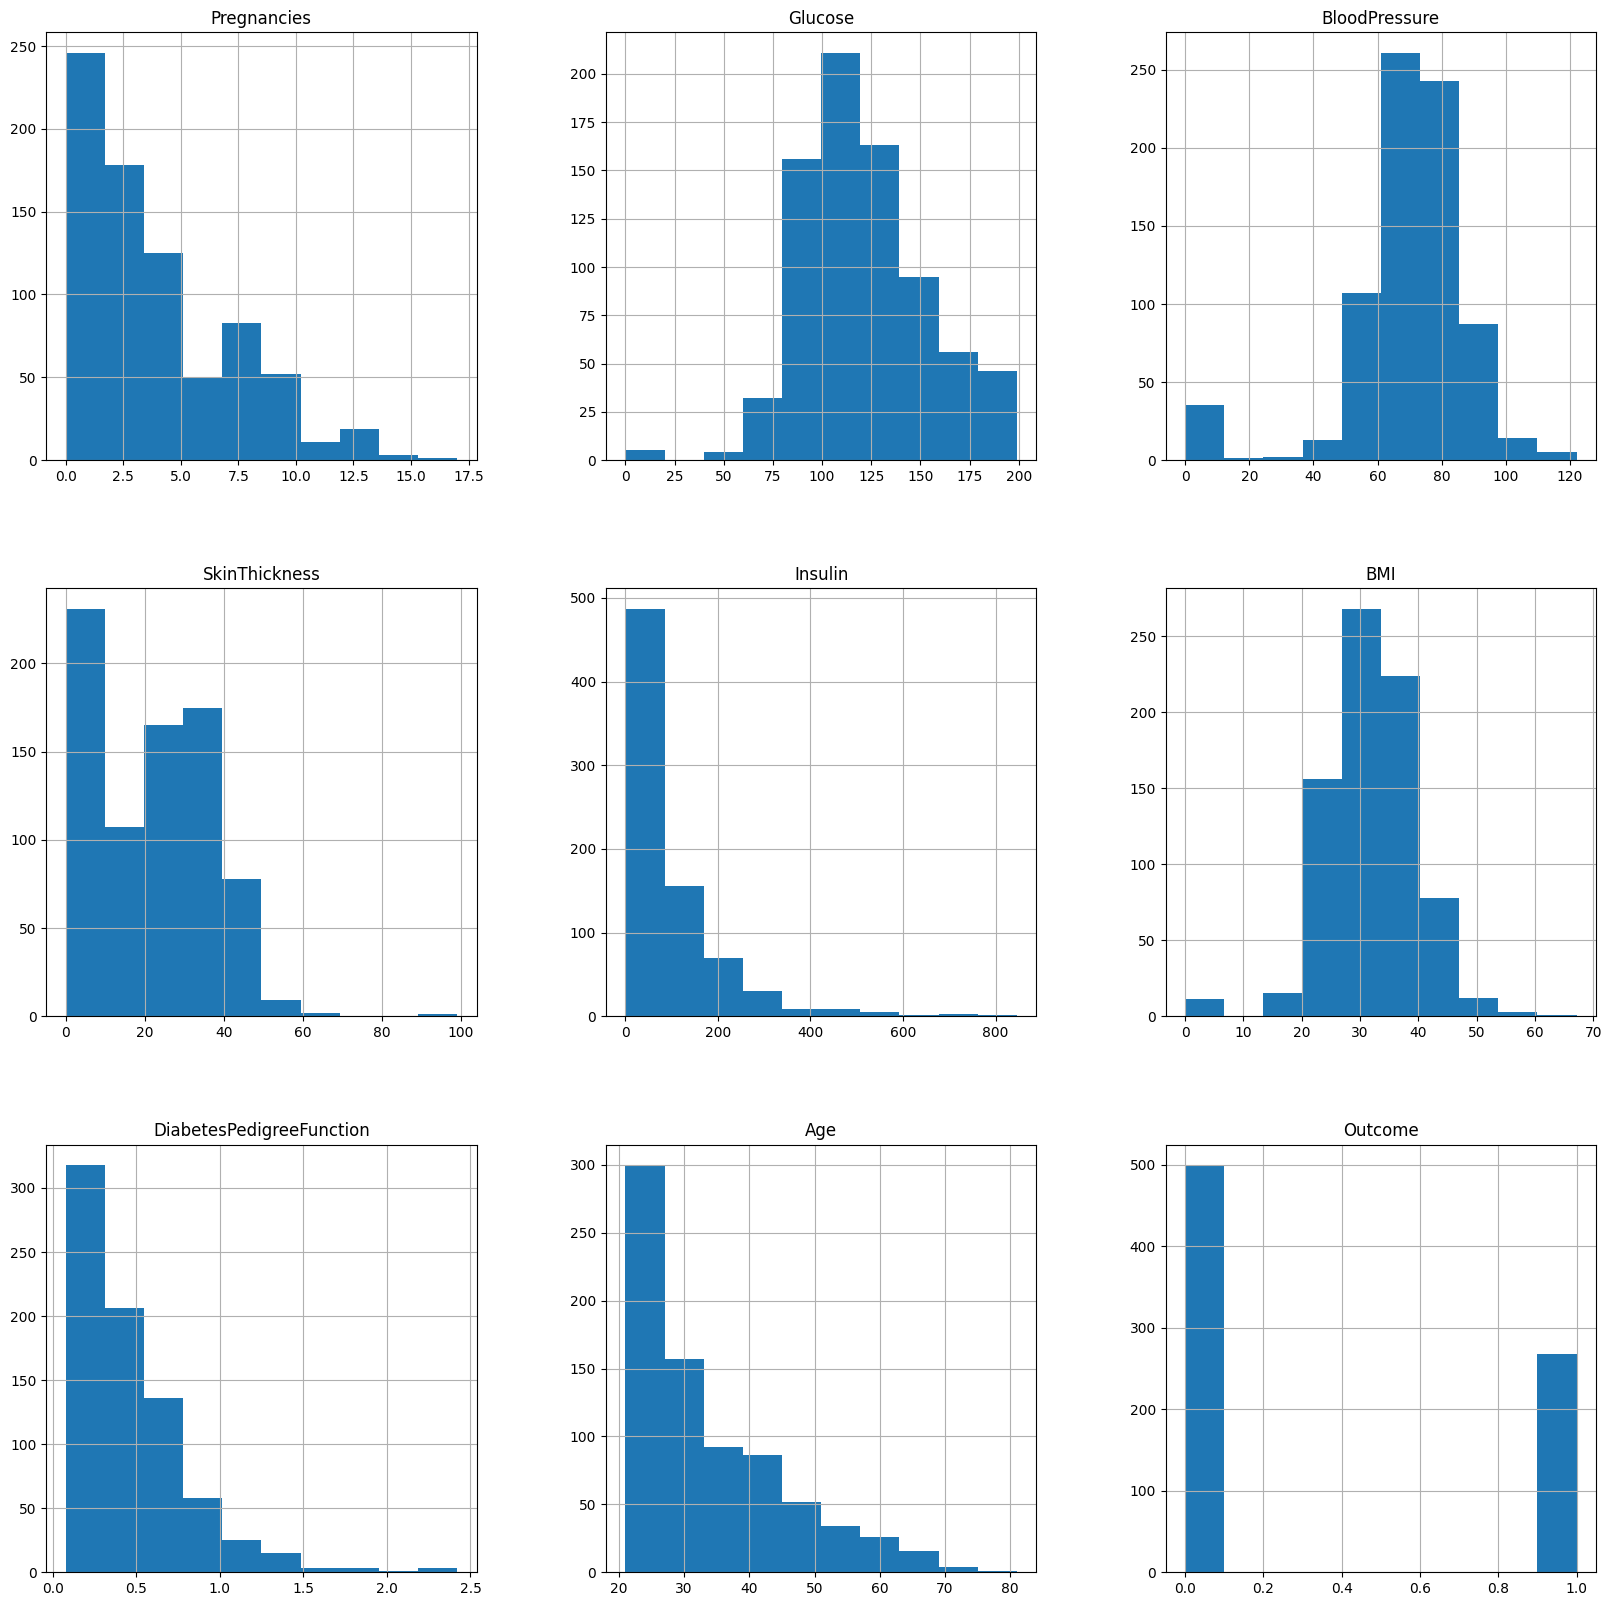

In [6]:
#Lets Explore the distribution of each of the columns without updating zero values
diab.hist(figsize = (20,20))

1. The histograms/distribution plot shows the same issue with zero values. For example the zero **Diastolic Blood Pressure** does not make sense.
2. Also shows the outcome distribution that the dataset is not balanced.

# Zero Values Fix

The 0 values in the colums 

**'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'**
does not make sense and since from their meaning they are continuous variables, let us replace 0 values them with the **mean value** of their column

In [7]:
upcols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for c in upcols:
    diab[c].replace(0,diab[c].mean(),inplace=True)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

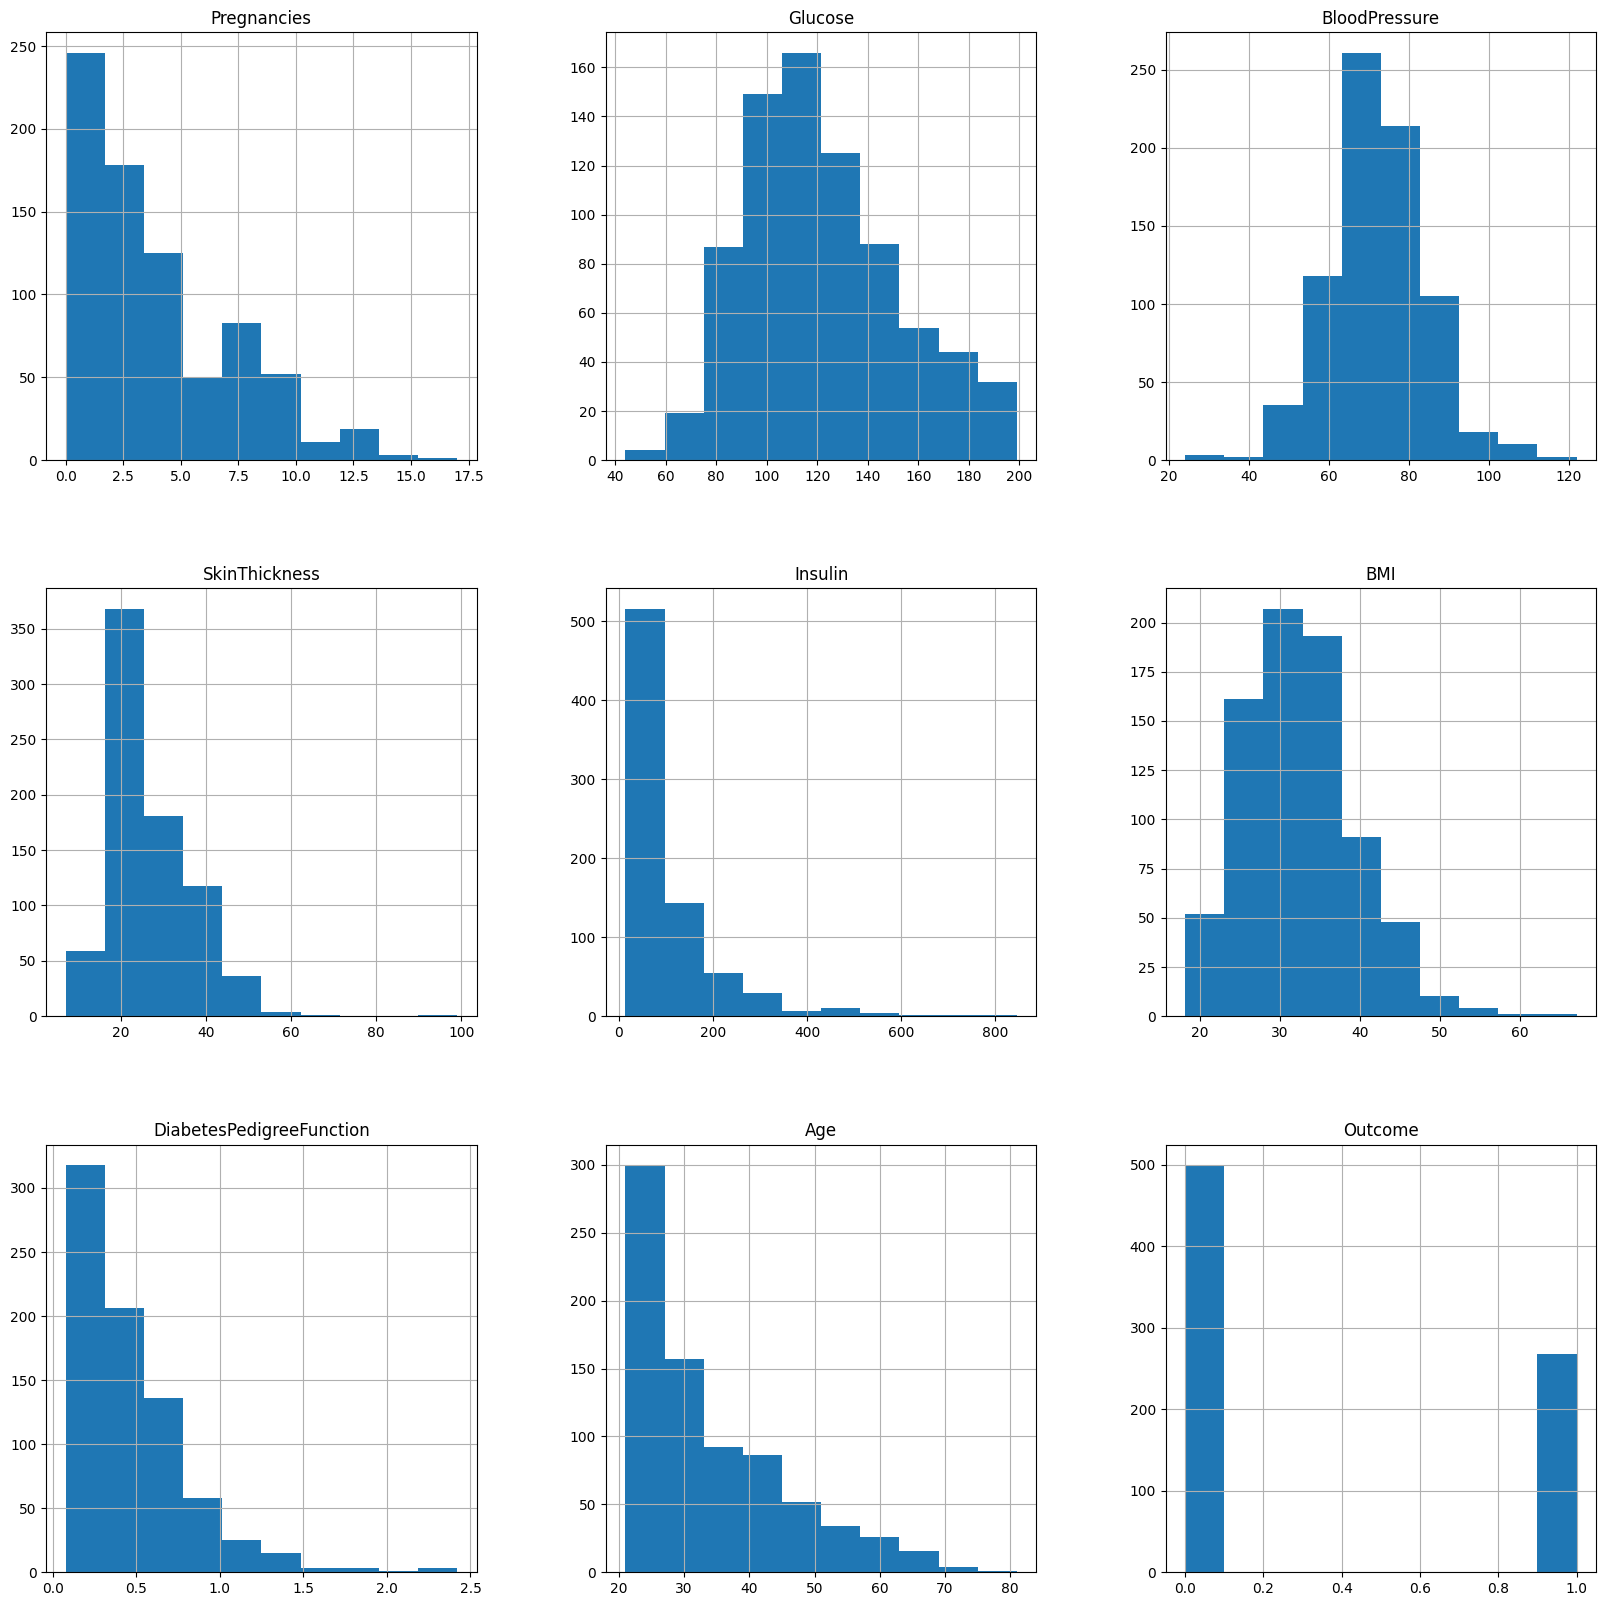

In [8]:
# Lets look at the histogram/distribution again
diab.hist(figsize = (20,20))

Now the columns with zero values replaced with their mean seems to have a fair distribution.

# Model Development

**How does K Nearest Neighbours Algorithm Work**

K-Nearest Neighbors Classifier first stores the training examples. 

During prediction, when it encounters a new instance (or test example) to predict, it finds the **K** number of training instances nearest to this new instance.  Then assigns the most common class among the K-Nearest training instances to this test instance.

The optimal choice for K is by validating errors on test data. K can also be chosen by the square root of m, where m is the number of examples in the dataset.

Pseducode:

1. Store all training examples.

2. Repeat steps 3, 4, and 5 for each test example.

3. Find the K number of training examples nearest to the current test example.
4. y_pred for current test example =  most common class among K-Nearest training instances.
5. Go to step 2.

Below I will write a class __KNearestNeighborsClassifier__ which follows above pseudocode. Keeping it simple, I would use Euclidean distance for deciding nearest neighbours which is also default for the sklearn model. There are other distance metrics for example, _manhattan_, _Minkowski_ etc.

In [9]:
import numpy as np 
from scipy.stats import mode 

# K Nearest Neighbors Classifier 
class KNearestNeighborsClassifier() : 
    """Classifier implementing the k-nearest neighbors.

    Parameters
    ----------
    K (no of neighbors) : int
        Number of neighbors to use by default for :meth:`kneighbors` queries.
    
    .. warning::

       Regarding the Nearest Neighbors algorithms, if it is found that two
       neighbors, neighbor `k+1` and `k`, have identical distances
       but different labels, the results will depend on the ordering of the
       training data.

    https://en.wikipedia.org/wiki/K-nearest_neighbor_algorithm

    Examples
    --------
    X = pd.DataFrame([[0], [1], [2], [3]])
    y = np.array([0, 0, 1, 1])
    kneighb = KNearestNeighborsClassifier(K=3)
    kneighb.fit(X.values, y)

    kneighb.predict(pd.DataFrame([[1.1]]).values)
    >>> array([0.])
    """
    
    def __init__( self, K: int ) :
        """use k to initialize no of neighbours to use for prediction."""
        self.K = K 
        
    # Method to store training set 
    def fit( self, X_train, Y_train) : 
        self.X_train = X_train 
        self.Y_train = Y_train 
        # no_of_training_examples, no_of_features 
        self.m, self.n = X_train.shape 

    # Method for prediction 
    def predict( self, X_test ) : 
        self.X_test = X_test 
        # no_of_test_examples, no_of_features 
        self.m_test, self.n = X_test.shape 
        # initialize Y_predict 
        Y_predict = np.zeros( self.m_test ) 
        for i in range( self.m_test ):
            x = self.X_test[i] 
            # find the K nearest neighbors from current test example 
            neighbors = np.zeros( self.K ) 
            neighbors = self.find_neighbors( x ) 
            # most frequent class in K neighbors 
            Y_predict[i] = mode( neighbors )[0]    
        return Y_predict 

    # Method to find the K nearest neighbors to current test example 
    def find_neighbors( self, x ) : 
    # calculate all the euclidean distances between current 
    # test example x and training set X_train 
        euclidean_distances = np.zeros( self.m ) 
        for i in range( self.m ) : 
            d = self.euclidean( x, self.X_train[i] ) 
            euclidean_distances[i] = d 
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted 
    
        inds = euclidean_distances.argsort() 
        Y_train_sorted = self.Y_train[inds] 
    
        return Y_train_sorted[:self.K] 

    # Method to calculate euclidean distance 
    def euclidean( self, x, x_train ) : 
        return np.sqrt( np.sum( np.square( x - x_train ) ) )

## Faeaure Engineering
### Scaling the data¶
Fauture columns are rescaled such that μ = 0 and 𝛔 = 1.
Scaling is important for any algorithm that uses any distance based metric for deciding the class of the outcome.As such if one feature has wider range of values, that feature would overshadow other fearure's distance.

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diab.copy().drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
Y = diab.Outcome

### Correlation
Let's test Pearson Correlation of variable with each other and the outcome

Text(0.5, 1.0, 'Correlation')

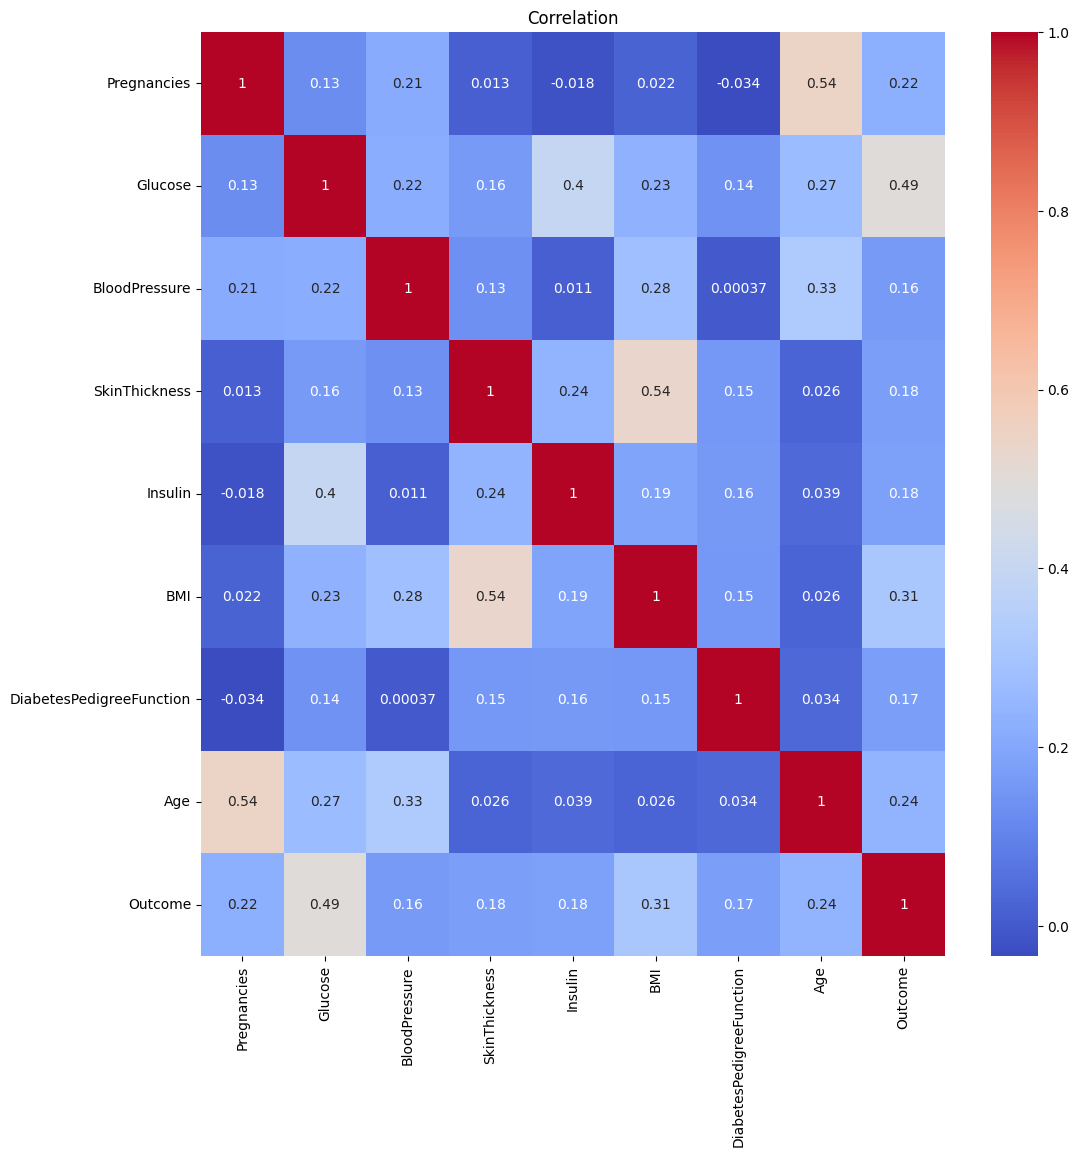

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(diab.corr(), annot=True, cmap='coolwarm').set_title('Correlation')

### Observations from Correlation plot
1. Pregnancies are correlation with Age (Perason Coeff is 0.54), which makes sense as all subjects are females and it seems obvious that as age grows they plan for motherhood.
2. Glucose (Plasma glucose concentration a 2 hours in an oral glucose tolerance test) is highly correlated(Perason Coeff is  0.49) to Outcome.
3. Diastolic BloodPressure is moderately correlated (Perason Coeff is  0.33) with Age, because as people generally grow old they face high BP issues.
4. SkinThickness is highly correlated with BMI (Perason Coeff is  0.54)
5. Insulin and Glucose (Perason Coeff is 0.4) has moderately high correlation

It will be interesting to train a model with and without removing the correlated variables to see how they affect model performance.

## Model Training (All Features)

In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# Splitting dataset into train and test set 
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 10 ) 
# Let's use K = square root of number of samples = sqrt(768) = ~27
self_knn = KNearestNeighborsClassifier( K = 27 ) 
# We are using values as I used numpy to do different calculations and the alogrithm expects numpy arrays
self_knn.fit( X_train.values, Y_train.values ) 


### Our Implemenation Model Performace Evaluation

Accuracy: 
 71.35

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.93      0.80       121
           1       0.75      0.34      0.47        71

    accuracy                           0.71       192
   macro avg       0.73      0.64      0.64       192
weighted avg       0.72      0.71      0.68       192
 



Text(0.5, 23.52222222222222, 'Predicted label')

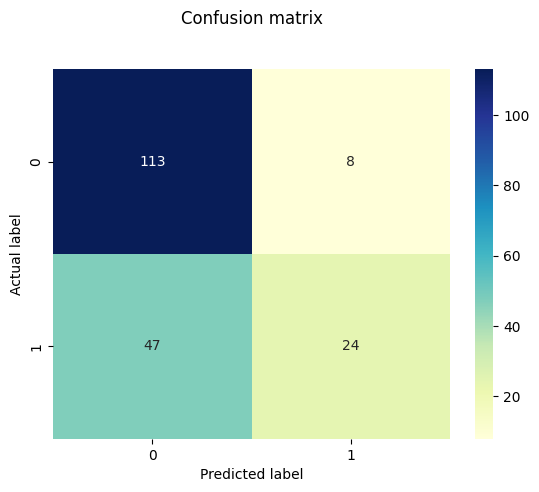

In [13]:
# Prediction on test set 
Y_pred_self_knn = self_knn.predict( X_test.values )
# Accuracy 
print("Accuracy: \n", round(accuracy_score(Y_test, Y_pred_self_knn) * 100, 2))

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report: \n", classification_report(Y_test, Y_pred_self_knn), '\n')

#Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_self_knn)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### sklearn Model Performace Evaluation and comparison to our model

Accuracy: 
 71.35

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.93      0.80       121
           1       0.75      0.34      0.47        71

    accuracy                           0.71       192
   macro avg       0.73      0.64      0.64       192
weighted avg       0.72      0.71      0.68       192
 



Text(0.5, 23.52222222222222, 'Predicted label')

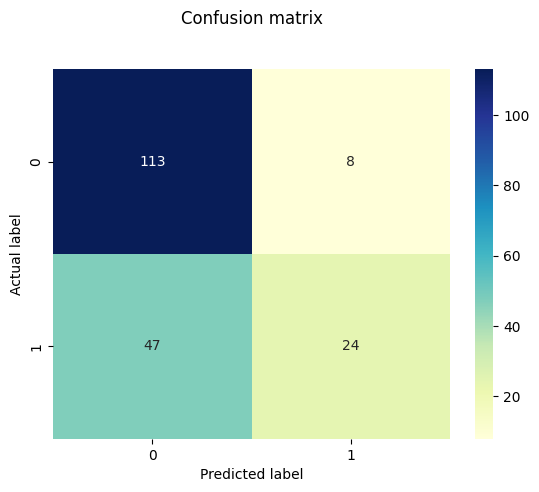

In [14]:
#Now Lets Compare our model to sklearn implementation
from sklearn.neighbors import KNeighborsClassifier 
skl_knn = KNeighborsClassifier( n_neighbors = 27 ) 
skl_knn.fit( X_train, Y_train )
Y_pred_skl_knn = skl_knn.predict( X_test ) 

# Accuracy 
print("Accuracy: \n", round(accuracy_score(Y_test, Y_pred_skl_knn) * 100, 2))

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report: \n", classification_report(Y_test, Y_pred_skl_knn), '\n')

#Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_skl_knn)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



### Results Compared
As we can see from above our self implementation and sklean results in similar results. Althout self implementation might not be optimized for speed , it does illuminate internals of an algorithm.

## Model with correlated features removed

1. Since Age is correlated to both **Pregnancies & BloodPressure** we can remove it.
2. **SkinThickness** is correlated with **BMI** so keeping one of them (_SkinThickness_).

In [15]:
diab_filtered = diab[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome']]
X =  pd.DataFrame(sc_X.fit_transform(diab_filtered.copy().drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction' ])
Y = diab_filtered.Outcome

Accuracy: 
 71.88

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       121
           1       0.71      0.41      0.52        71

    accuracy                           0.72       192
   macro avg       0.71      0.65      0.66       192
weighted avg       0.72      0.72      0.70       192
 



Text(0.5, 23.52222222222222, 'Predicted label')

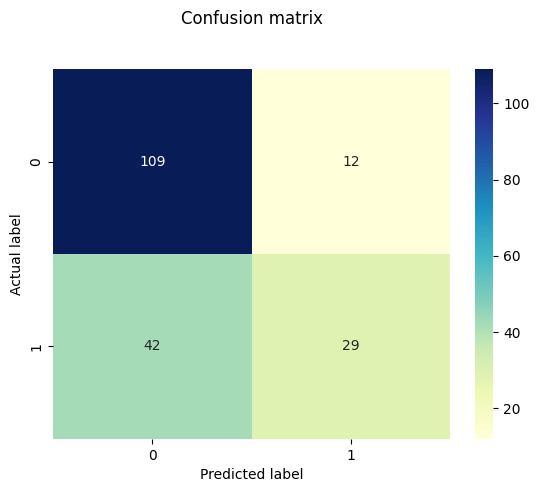

In [16]:
# Splitting dataset into train and test set 
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 10 ) 

# Train a Sklearn model
skl_knn = KNeighborsClassifier( n_neighbors = 27 ) 
skl_knn.fit( X_train, Y_train )
Y_pred_skl_knn = skl_knn.predict( X_test ) 

# Accuracy 
print("Accuracy: \n", round(accuracy_score(Y_test, Y_pred_skl_knn) * 100, 2))

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report: \n", classification_report(Y_test, Y_pred_skl_knn), '\n')

#Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_skl_knn)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Results Compared
As we can see from above model accuracy improves a little, but the model is making more mistakes for class 0 whereas it improves on class 1 which matters most.

## Method to find optimal K

There are many methods available including **Grid Search with Cross-Validation, Leave-P-Out Cross-Validation** but I would use the simplest called the elbow method. This method trains many models for different k values and then evaluate their performance. Then we plot a chart where the optimal value of K is at the value until the performance metric(Error rate) goes down and starts to go up.

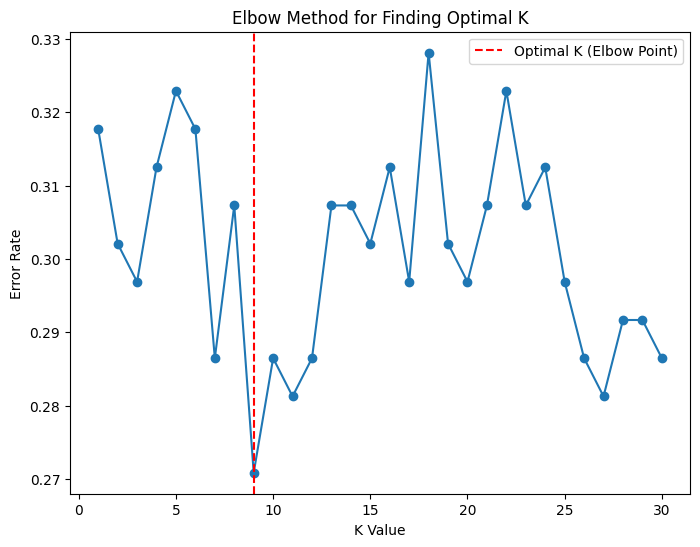

In [17]:
k_values = range(1, 31)
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(Y_test, y_pred)
    error_rates.append(error_rate)

plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=9, linestyle='--', color='red', label="Optimal K (Elbow Point)")
plt.legend()
plt.show()

As we can see from above plot the optimal value for **K** is 9. Let's test and evaluate a KNN model with K=9

Accuracy: 
 72.92

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.90      0.81       121
           1       0.72      0.44      0.54        71

    accuracy                           0.73       192
   macro avg       0.73      0.67      0.68       192
weighted avg       0.73      0.73      0.71       192
 



Text(0.5, 23.52222222222222, 'Predicted label')

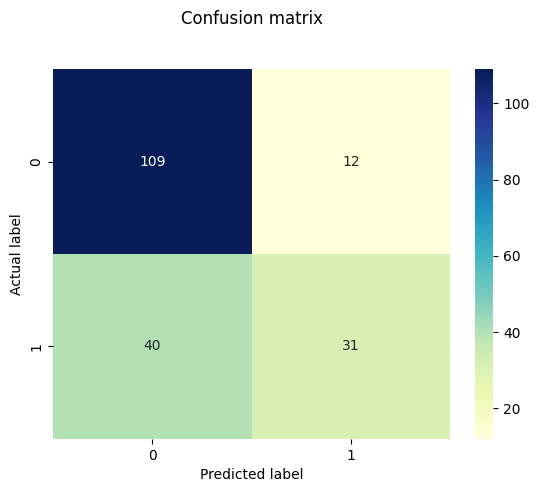

In [18]:
# Train a Sklearn model
skl_knn = KNeighborsClassifier( n_neighbors = 9 ) 
skl_knn.fit( X_train, Y_train )
Y_pred_skl_knn = skl_knn.predict( X_test ) 

# Accuracy 
print("Accuracy: \n", round(accuracy_score(Y_test, Y_pred_skl_knn) * 100, 2))

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report: \n", classification_report(Y_test, Y_pred_skl_knn), '\n')

#Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_skl_knn)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Results Compared
As we can see from above model performace metrics the model performace improves by using an optimal K.